In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

df = pd.read_csv('NYC_property_sales.csv')

T-Score: -0.67
P-Value: 0.51
Fail to reject null hypothesis: There is no significant difference between the sample and population means.
Sample Mean: 2076052.2
Difference between Population and Sample Mean: 355289.65
Z-Critical Value: 1.96
Confidence Interval: (1485034.87, 2667069.53)


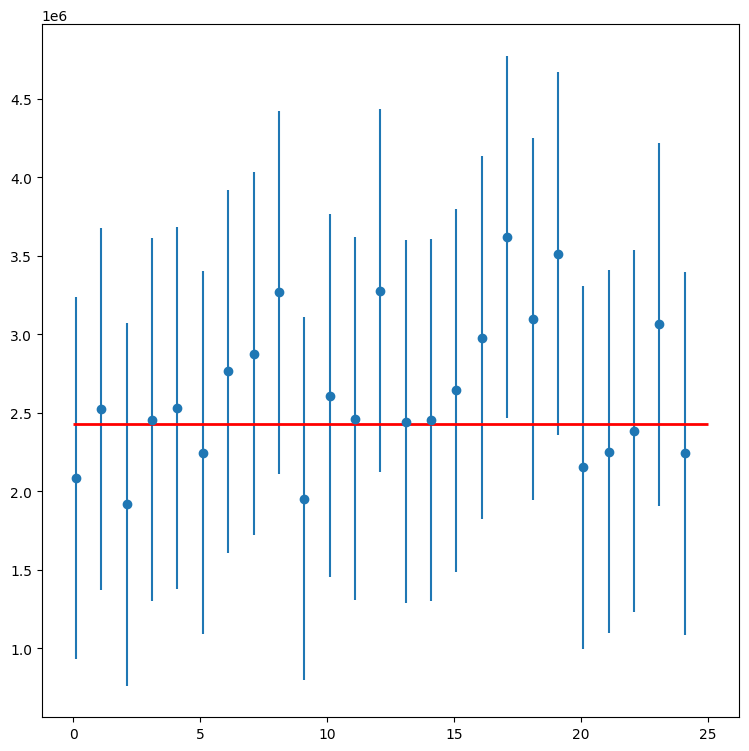

T-Score: -1.74
P-Value: 0.08
Fail to reject null hypothesis: There is no significant difference between the sample and population means.


In [64]:
def main():
    sale_price = df['sale_price'].to_numpy()
    
    np.random.seed(10)
    sample_size_percentage = 10  
    sample_size = int(len(df) * (sample_size_percentage / 100))
    sample_sale_price = np.random.choice(a=sale_price, size=sample_size)
    sample_mean = sample_sale_price.mean()
    
    print("Sample Mean:", round(sample_mean, 2))
    
    population_mean = sale_price.mean()
    difference = population_mean - sample_mean
    
    print("Difference between Population and Sample Mean:", round(difference, 2))
    
    z_critical = stats.norm.ppf(q=0.975)  # Get the z-critical value for 95% confidence level
    
    print("Z-Critical Value:", round(z_critical, 2))
    
    pop_stdev = sale_price.std()  # Get the population standard deviation
    
    margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))
    
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    
    print("Confidence Interval:", tuple(round(val, 2) for val in confidence_interval))
    
    np.random.seed(12)

    sample_size = 1000
    
    intervals = []
    sample_means = []
    
    for sample in range(25):
        sample = np.random.choice(a=sale_price, size=sample_size)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)
    
        z_critical = stats.norm.ppf(q=0.975)  # Get the z-critical value*
    
        pop_stdev = sale_price.std()  # Get the population standard deviation
    
        margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))
    
        confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  
        
        intervals.append(confidence_interval)
        
    plt.figure(figsize=(9, 9))
    plt.errorbar(x=np.arange(0.1, 25, 1), 
                 y=sample_means, 
                 yerr=[abs((top - bot) / 2) for top, bot in intervals],
                 fmt='o')
    
    plt.hlines(xmin=0, xmax=25,
               y=population_mean, 
               linewidth=2.0,
               color="red")
    plt.show()
    
    # Perform hypothesis testing
    hypothesis_testing(sample_sale_price, population_mean)

def hypothesis_testing(sample, population_mean, alpha=0.05):
    t_statistic, p_value = stats.ttest_1samp(a=sample, popmean=population_mean)
    
    
    print("T-Score:", round(t_statistic, 2))
    print("P-Value:", round(p_value, 2))
    
    if p_value < alpha:
        print("Reject null hypothesis: There is a significant difference between the sample and population means.")
    else:
        print("Fail to reject null hypothesis: There is no significant difference between the sample and population means.")

sample_size = 100
sample_data = np.random.normal(loc=50, scale=10, size=sample_size)  
population_mean = 50

# Call the hypothesis_testing function with generated data
hypothesis_testing(sample_data, population_mean)
main()


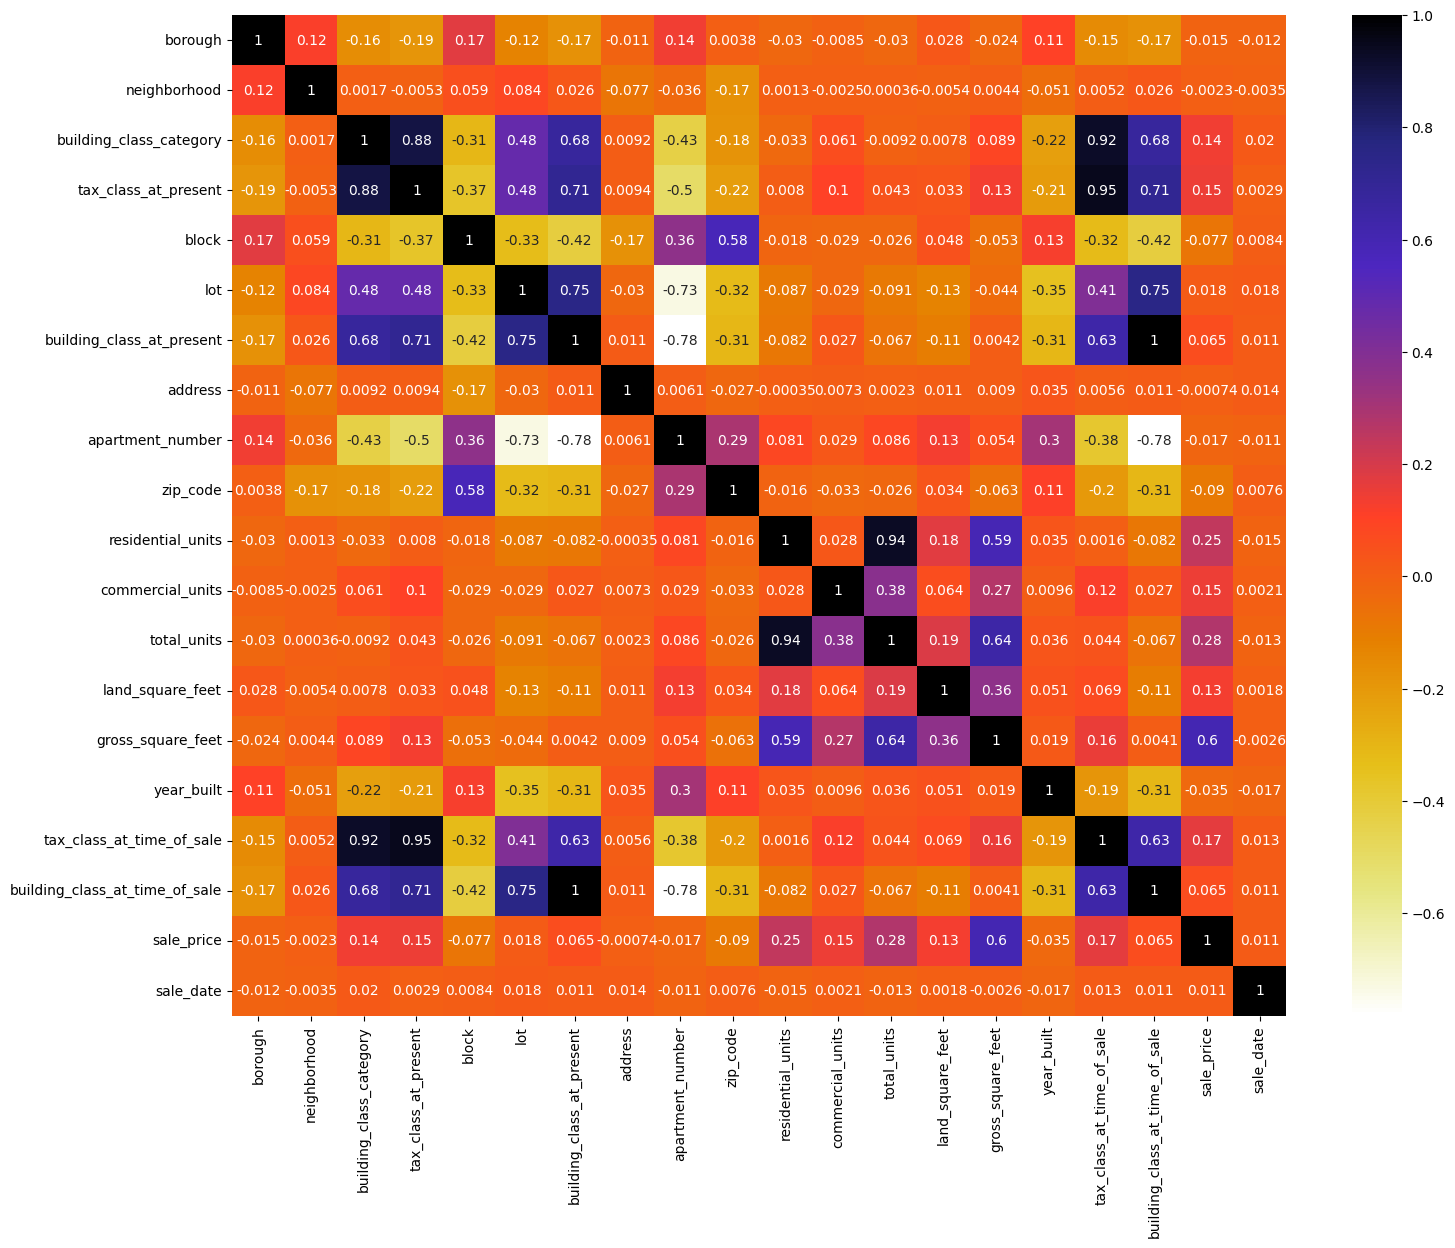

<Axes: >

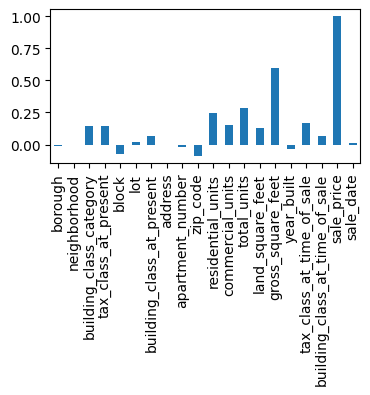

In [63]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])
    
correlation_matrix = df.corr()

plt.figure(figsize = (17,13))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

df.corr()['sale_price'][:].plot(figsize=(4,2), kind='bar')

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr